In [8]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *
from overlap_genes import get_best_genes_names

np.random.seed(1)
random.sedd(1)

# Baseline with preselected genes for L1210

In [2]:
#Load preprocess data
L = np.array(pd.read_csv ('../data/processed_data/L1210csv_process.csv'))
y = np.array(L[:,-1],dtype=int)
L = L[:,0:-1]

In [3]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L,y)

In [4]:
print(L.shape, len(pred))
acc = model.score_
print(acc)

(67, 6679) 67
0.6976744186046512


In [5]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.32967032967032966, 0.9910836762688614, 0.6976744186046512, 0.9594953519256308, 0.3023255813953488, 0.6703296703296703)


# Filter methods

# Mutual information maximizer (MIR)

[  40   54   63   65   84  110  116  283  306  307  323  389  463  474
  478  555  671  702  737  739  748  761  833  837  887  912 1022 1043
 1049 1073 1074 1140 1164 1179 1302 1371 1397 1423 1532 1579 1628 1638
 1704 1718 1732 1802 1846 2014 2118 2134 2135 2152 2232 2378 2549 2694
 2695 2736 2848 2905 2906 2909 2915 2939 2992 3120 3206 3237 3259 3275
 3537 3558 3573 3679 3685 3724 3775 3825 3835 3893 3909 3951 4013 4083
 4107 4108 4114 4119 4121 4203 4234 4373 4388 4414 4423 4480 4677 4856
 4973 5048 5172 5205 5232 5239 5277 5372 5398 5506 5621 5674 5684 5693
 5698 5785 5842 5887 5903 6086 6126 6173 6253 6273 6500 6551 6558 6560
 6565 6599 6649 6666] 0.7191011235955056


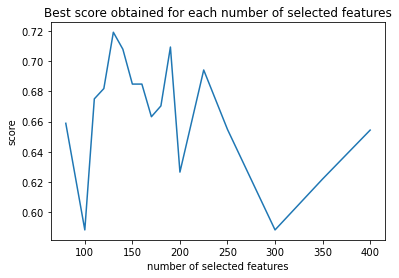

In [22]:
N = np.array([80,100,110,120,130,140,150,160,170,180,190,200,225,250,300,350,400])
best_subset, best_score = MIR(y, L, FamiliesClusters,  compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [23]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

130
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7191011235955056, 0.9935064935064936, 0.927536231884058, 0.9683544303797469, 0.07246376811594203, 0.2808988764044944)


[  54   63   65  283  474  478  833  887 1164 1302 1371 1704 1732 2014
 2134 2152 2549 2694 2906 2939 2992 3237 3275 3537 3679 3685 3835 4013
 4083 4114 4373 5048 5205 5506 5684 5693 5785 5887 6273 6560 6565] 0.7808219178082192


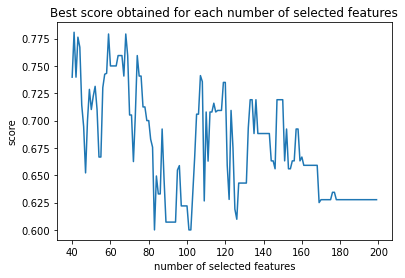

In [4]:
N = np.arange(40,200,1)
best_subset, best_score = MIR(y, L, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [5]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

41
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7808219178082192, 0.9709401709401709, 0.7702702702702703, 0.9726027397260274, 0.22972972972972974, 0.2191780821917808)


# Mutual information feature selection (MIFS)


[  26   53   58   62   74   83  107  187  236  263  336  360  384  413
  458  475  577  589  616  655  828  838  978  990 1118 1217 1245 1271
 1324 1337 1353 1395 1518 1647 1707 1728 1747 1785 1811 1838 1925 1927
 1957 2155 2203 2239 2321 2375 2436 2558 2633 2667 2762 2763 2782 2848
 2850 3083 3084 3216 3360 3452 3527 3565 3623 3823 3879 4005 4051 4068
 4163 4175 4307 4407 4438 4472 4536 4583 4869 4892 5013 5318 5441 5586
 5724 5741 5742 5894 5984 6022 6095 6130 6205 6282 6333 6430 6528 6633
 6647 6674] 0.25


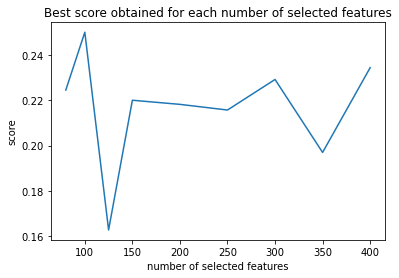

In [24]:
N = np.array([100,150,250,300,400])
best_subset, best_score = MIFS(y, L, FamiliesClusters,  compute_sensitivity,True,N, 1, plot=True)
print(best_subset, best_score)

In [25]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

100
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.25, 0.9014084507042254, 0.11267605633802817, 0.96, 0.8873239436619719, 0.75)


# Joint Mutual Information (JMI)

[ 303  585 1093 1390 2482 3224 3264 3563 4415 4431 4437 4481 4488 4489
 4555 4608 4664 4668 4677 4819 4843 4857 4886 4908 4915 4987 5008 5019
 5023 5065 5071 5164 5180 5211 5214 5226 5301 5435 5482 5542 5548 5566
 5624 5696 5699 5704 5796 5849 5870 5915 5917 5919 5947 5991 6039 6043
 6111 6112 6113 6123 6183 6204 6210 6231 6300 6350 6367 6373 6377 6404
 6429 6539 6568 6582 6600 6607 6634 6641 6670 6674] 0.375


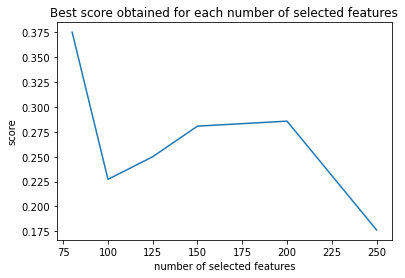

In [26]:
N = np.array([100,150,250,300,400])
best_subset, best_score = JMI(y, L, FamiliesClusters,  compute_sensitivity ,True, N, plot=True)
print(best_subset, best_score)

In [27]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

80
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.375, 0.9121212121212121, 0.13432835820895522, 0.9756888168557536, 0.8656716417910447, 0.625)


# Double input symmetrical relevance (DISR)

[   3   33   64   88   95  101  119  120  127  131  151  198  260  294
  303  341  400  401  437  451  455  468  476  482  497  510  518  532
  540  557  585  610  613  615  627  628  637  643  645  651  659  660
  662  675  680  692  694  695  696  710  723  724  730  750  770  773
  792  800  820  821  847  870  879  891  894  897  906  924  937  939
  943  980 1047 1072 1082 1093 1114 1127 1139 1172 1207 1209 1220 1229
 1263 1285 1319 1388 1390 1391 1430 1439 1457 1467 1484 1522 1550 1632
 1681 1716 1740 1750 1774 1800 1812 1848 1903 1931 1960 2006 2014 2034
 2043 2062 2071 2105 2110 2136 2173 2183 2187 2205 2235 2255 2270 2344
 2347 2349 2475 2482 2498 2552 2568 2570 2606 2642 2706 2757 2775 2785
 2843 2847 2849 2869 2897 2902 2927 2931 2964 2969 2970 2988 2992 2993
 3006 3009 3020 3021 3031 3032 3050 3070 3080 3082 3090 3133 3172 3175
 3203 3224 3227 3237 3241 3264 3336 3355 3361 3362 3364 3385 3420 3429
 3433 3441 3451 3460 3468 3491 3494 3497 3505 3512 3535 3563 3568 3578
 3591 

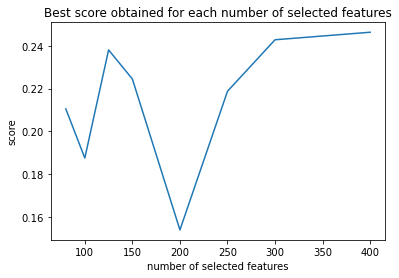

In [28]:
N = np.array([100,150,250,300,400])
best_subset, best_score = DISR(y, L, FamiliesClusters,  compute_sensitivity,True, N, plot=True)
print(best_subset, best_score)

In [29]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.2463768115942029, 0.9714285714285714, 0.3269230769230769, 0.9581320450885669, 0.6730769230769231, 0.7536231884057971)


# Fisher's score

[   9   13   36   46  113  122  175  178  255  303  399  406  503  529
  540  548  558  737  781  787  832  835  844  848  882  997 1040 1121
 1131 1138 1157 1293 1295 1302 1308 1353 1392 1418 1432 1433 1448 1460
 1476 1502 1512 1618 1703 1705 1759 1765 1811 1817 1873 1898 1926 2040
 2049 2202 2234 2278 2411 2507 2569 2587 2649 2660 2661 2717 2725 2804
 2813 2854 2954 3002 3015 3056 3075 3114 3124 3142 3151 3260 3338 3445
 3465 3527 3621 3646 3729 3748 3753 3859 3912 4166 4176 4231 4236 4282
 4377 4402 4412 4417 4424 4483 4613 4660 4723 4754 4763 4875 4885 4901
 4915 4989 5121 5131 5165 5173 5252 5254 5255 5288 5326 5332 5421 5479
 5485 5531 5549 5702 5749 5766 5924 5970 6144 6204 6249 6297 6312 6354
 6417 6421 6449 6472 6493 6537 6538 6569 6588 6651] 0.3333333333333333


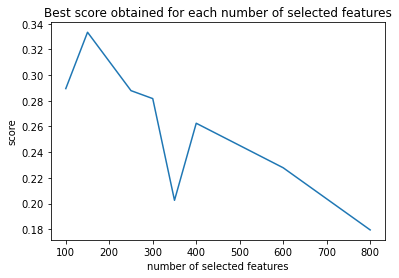

In [30]:
N = np.array([100,150,250,300,400,500,600,800])
best_subset, best_score = fishers_score(y, L, FamiliesClusters, compute_sensitivity,True,N, plot=True)
print(best_subset, best_score)

In [31]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

150
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3333333333333333, 0.9476885644768857, 0.24561403508771928, 0.9653035935563816, 0.7543859649122807, 0.6666666666666666)


# Laplacian score

[   1    3   12   18   22   49   53   64   65   88   92   97   98  113
  136  144  154  167  171  177  182  184  197  214  223  240  259  260
  272  280  303  318  333  334  350  395  460  466  472  483  504  518
  525  542  549  555  556  566  570  596  597  622  632  639  646  652
  672  690  718  720  721  722  732  736  756  759  780  809  834  860
  861  877  919  926  945  972  991 1005 1030 1043 1066 1067 1080 1117
 1122 1123 1133 1159 1207 1255 1258 1259 1272 1292 1318 1319 1347 1383
 1388 1398 1400 1414 1428 1435 1473 1474 1484 1498 1504 1513 1535 1541
 1554 1596 1613 1620 1626 1627 1632 1636 1669 1674 1689 1709 1721 1754
 1764 1801 1803 1818 1819 1833 1852 1857 1880 1882 1910 1932 1967 1975
 1988 1995 1996 2075 2076 2083 2094 2096 2113 2121 2140 2161 2167 2170
 2197 2207 2213 2219 2227 2252 2278 2281 2302 2357 2358 2366 2395 2400
 2420 2433 2437 2476 2486 2487 2488 2519 2528 2535 2548 2581 2586 2606
 2607 2626 2629 2638 2640 2664 2677 2691 2695 2702 2703 2740 2743 2762
 2772 

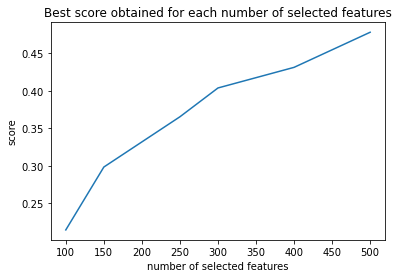

In [4]:
N = np.array([100,150,250,300,400,500])
best_subset, best_score = laplacian_score(y, L, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [5]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3235294117647059, 0.9803117309269893, 0.4782608695652174, 0.9629331184528606, 0.5217391304347826, 0.6764705882352942)


# ReliefF algorithm

[   3   31   40   42   48   55  130  133  161  177  228  229  230  235
  242  249  262  301  315  323  341  356  379  390  401  402  404  416
  442  446  456  524  555  561  576  581  633  639  664  720  748  754
  782  818  845  847  851  865  880  887  912  921  931  938  952  977
  985  991 1053 1056 1074 1079 1102 1106 1111 1146 1156 1161 1174 1195
 1222 1245 1252 1254 1266 1272 1280 1282 1296 1305 1317 1340 1364 1371
 1397 1411 1416 1427 1471 1515 1519 1549 1628 1638 1643 1654 1683 1700
 1702 1704 1706 1724 1732 1734 1768 1795 1801 1821 1866 1882 1894 1897
 1900 1936 1960 1996 2031 2039 2049 2077 2081 2090 2092 2094 2114 2126
 2127 2135 2137 2152 2164 2168 2173 2205 2211 2235 2239 2250 2280 2291
 2301 2304 2329 2358 2392 2414 2456 2457 2477 2483 2498 2499 2516 2524
 2526 2535 2549 2557 2573 2627 2643 2670 2683 2709 2753 2783 2790 2807
 2822 2838 2848 2917 2919 2932 2933 2939 2948 2953 2966 2973 2979 2981
 2992 3009 3040 3044 3055 3064 3066 3073 3078 3090 3099 3103 3125 3139
 3175 

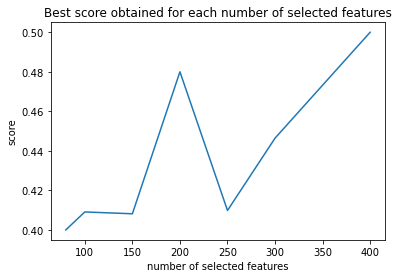

In [36]:
N = np.array([100,150,250,300,400])
best_subset, best_score = reliefF(y, L, FamiliesClusters, compute_sensitivity,True, N, 5, plot=True)
print(best_subset, best_score)

In [37]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5, 0.975, 0.5892857142857143, 0.964516129032258, 0.4107142857142857, 0.5)


# Fast Correlation Based Filter algorithm (FCBF)

[   5   31   34   77  143  151  246  249  340  376  388  439  440  466
  503  557  579  585  593  653  663  668  731  809  843  847  899  914
  954  956  960  978  996 1018 1049 1079 1082 1096 1105 1136 1137 1158
 1210 1243 1254 1286 1302 1305 1307 1336 1361 1480 1495 1557 1578 1668
 1689 1696 1716 1741 1866 1876 1899 1913 2031 2066 2097 2124 2149 2195
 2205 2237 2239 2244 2272 2276 2321 2348 2403 2405 2406 2407 2411 2413
 2417 2423 2434 2443 2478 2501 2505 2508 2571 2586 2625 2643 2670 2674
 2695 2725 2744 2752 2763 2805 2822 2880 2886 2903 3001 3034 3065 3095
 3138 3168 3172 3179 3187 3192 3198 3207 3222 3369 3381 3450 3518 3522
 3535 3563 3590 3595 3624 3645 3668 3694 3742 3746 3765 3772 3816 3836
 3860 3887 3895 3911 3919 3932 3947 3954 3967 3985 3987 4011 4020 4035
 4039 4197 4239 4260 4297 4325 4342 4350 4367 4388 4389 4432 4554 4596
 4608 4641 4744 4772 4779 4789 4793 4809 4814 4924 4940 5063 5071 5088
 5100 5113 5115 5172 5197 5209 5216 5233 5243 5257 5260 5365 5416 5489
 5499 

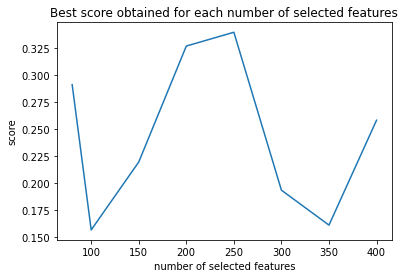

In [38]:
N = np.array([100,150,250,300,400])
best_subset, best_score = FCBF(y, L, FamiliesClusters, compute_sensitivity,True, N, plot=True)
print(best_subset, best_score)

In [39]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

250
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3392857142857143, 0.9636363636363636, 0.3333333333333333, 0.9645593869731801, 0.6666666666666666, 0.6607142857142857)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\alexi\anaconda3\lib\site-packages\pyHSICLasso\api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 67. Number of blocks 3.35 will be approximated to 3.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\alexi\anaconda3\lib\site-packages\pyHSICLasso\nlars.py:77: RuntimeWarning: divide by zero encountered in true_divide
  gamma1 = (C - c[I]) / (XtXw[A[0]] - XtXw[I])


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[  54   63   65  112  154  191  283  299  350  387  389  474  555  702
  782  808  887  900 1122 1343 1393 1456 1628 1732 1778 1911 2014 2053
 2152 2408 2549 2932 2992 3004 3120 3191 3237 3261 3275 3297 3346 3388
 3459 3577 3657 3679 3688 3787 3825 3835 3866 3956 3986 4028 4108 4200
 4203 4238 4257 4280 4373 4419 4681 4731 4866 4998 5111 5148 5181 5196
 5229 5259 5424 5526 5586 5668 5688 5710 5724 5825 5857 5864 5885 5887
 6033 6165 6255 6273 6278 6281 6284 6301 6342 6362 6402 6418 6499 6565
 6590 6644] 0.7272727272727273


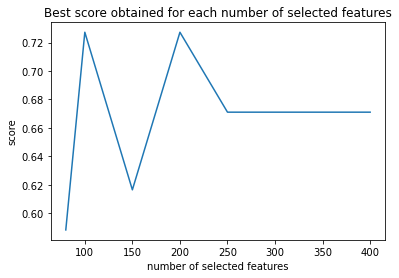

In [40]:
N = np.array([100,150,250,300,400])
best_subset, best_score = HsicLasso(y, L, FamiliesClusters, compute_sensitivity,True, N, plot=True)
print(best_subset, best_score)

In [41]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

100
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7272727272727273, 0.9693721286370597, 0.7058823529411765, 0.9723502304147466, 0.29411764705882354, 0.2727272727272727)


# Wrapper methods

# Stochastic optimization of features selection 

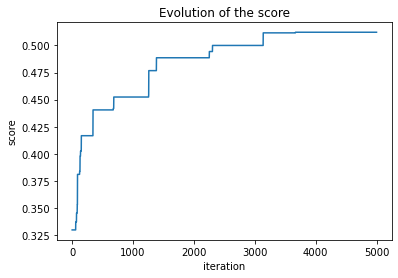

0.5121951219512195


In [45]:
best_subset, best_score  = hillclimbing(y, L, FamiliesClusters,  compute_sensitivity,True, 5000, 0.1, True)
print(best_score)

In [46]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3406
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5121951219512195, 0.9872423945044161, 0.7636363636363637, 0.9617590822179732, 0.23636363636363636, 0.4878048780487805)


# Stimulated annealing

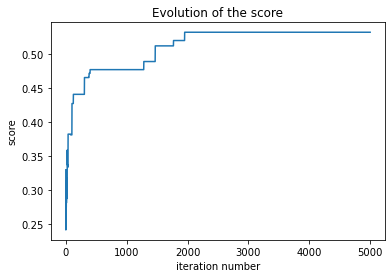

0.5316455696202531


In [47]:
best_subset, best_score  = stimulated_annealing(y, L, FamiliesClusters,  compute_sensitivity,True, 5000, 0.1, 1, True)
print(best_score)

In [48]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

3345
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5316455696202531, 0.987279843444227, 0.7636363636363637, 0.9646271510516252, 0.23636363636363636, 0.46835443037974683)


# Genetic feature selection algorithm

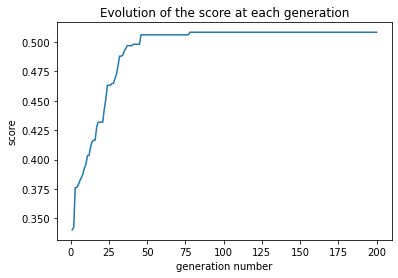

0.508330241187384


In [49]:
best_subset, best_score  = genetic_fs(y,L,FamiliesClusters,  compute_sensitivity,True, 300, 0.5, 0.2, 200, 3, True)
print(best_score)

In [50]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

2256
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6338028169014085, 0.9856035437430787, 0.7758620689655172, 0.9716157205240175, 0.22413793103448276, 0.36619718309859156)


# Hybrid methods

# Mutual information and stimulated annealing

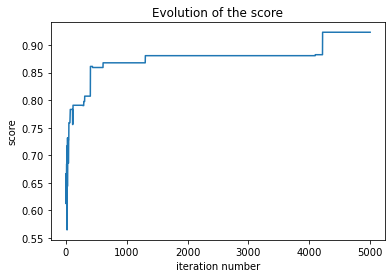

[  37   63   78   94  116  122  125  136  154  161  205  256  269  286
  323  326  327  343  350  356  370  389  435  450  463  537  565  671
  701  702  720  734  737  761  818  837  902  906  984 1043 1074 1094
 1105 1122 1129 1146 1151 1170 1197 1201 1239 1254 1261 1266 1296 1302
 1312 1397 1423 1456 1495 1508 1704 1732 1802 1834 1872 1884 2026 2041
 2081 2135 2173 2232 2378 2423 2477 2549 2694 2715 2736 2753 2893 2915
 2965 2975 3043 3097 3120 3139 3181 3244 3275 3335 3388 3415 3455 3481
 3522 3525 3558 3611 3736 3754 3775 3789 3825 3835 3909 3951 3966 4073
 4107 4114 4121 4145 4150 4156 4198 4227 4234 4373 4423 4429 4494 4520
 4533 4542 4545 4614 4692 4749 4804 4813 4816 4818 4831 4841 4916 4924
 4944 5020 5069 5172 5202 5205 5217 5258 5269 5290 5337 5352 5465 5528
 5543 5581 5593 5594 5639 5641 5648 5653 5668 5674 5684 5693 5724 5785
 5821 5825 5850 5885 5887 5892 5903 5943 5951 6144 6168 6188 6237 6253
 6273 6275 6281 6364 6374 6539 6551 6560 6598 6599 6666] 0.9230769230769231


In [51]:
best_subset, best_score = MI_stimulated_annealing(y,L, FamiliesClusters,  compute_sensitivity,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [52]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

193
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9230769230769231, 0.9504504504504504, 0.7317073170731707, 0.9882903981264637, 0.2682926829268293, 0.07692307692307693)


# Mutual information and genetic feature selection

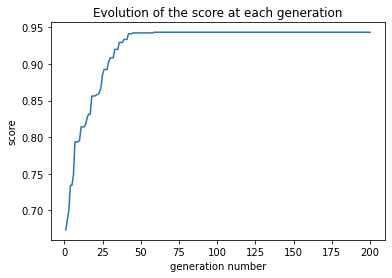

[  32   63   67   71  103  112  122  144  301  305  356  395  412  474
  514  521  565  651  700  720  748  755  811  862  948  967 1061 1074
 1081 1104 1105 1122 1164 1170 1192 1201 1259 1299 1364 1375 1410 1481
 1503 1553 1630 1641 1788 1793 1802 1961 2014 2021 2046 2110 2151 2180
 2239 2423 2462 2477 2484 2549 2551 2573 2591 2616 2646 2648 2651 2686
 2695 2703 2736 2887 3043 3076 3195 3235 3259 3275 3283 3335 3441 3452
 3453 3455 3522 3547 3573 3578 3672 3685 3736 3743 3764 3775 3835 3840
 3879 3893 3922 3934 3949 4013 4016 4064 4114 4134 4156 4203 4253 4328
 4375 4414 4491 4511 4543 4749 4813 4816 4818 4821 4827 4852 4973 4984
 4989 4998 5085 5132 5133 5172 5179 5181 5224 5269 5277 5300 5314 5376
 5388 5398 5450 5484 5506 5528 5541 5543 5572 5586 5593 5629 5636 5641
 5667 5674 5684 5785 5787 5861 5951 5991 6021 6253 6273 6315 6421 6624
 6655] 0.9432483605199501


In [53]:
best_subset_L, best_score = MI_genetic_fs(y,L, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  300, 0.5, 0.2, 200, 3, True)
print(best_subset_L, best_score)

In [59]:
print(len(best_subset_L))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(L[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

169
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9305555555555556, 0.965675057208238, 0.8170731707317073, 0.9882903981264637, 0.18292682926829268, 0.06944444444444445)


# Best method = MI/GA

In [9]:
#Create .csv with names of this subset
get_best_genes_names(best_subset_L, '../data/processed_data/L1210genes_interest.csv', '../data/optimized_subsets/L1210genes_best.csv')